#### student ID : 20141445

##### import librarys

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import random
import sys
import collections

##### Load image and define constants and label array

In [2]:
image = Image.open('picture2.jpg')
pixels = np.array(image)
height = len(pixels)
width = len(pixels[0])
Ks = [2, 3, 6, 12]

##### define functions

##### energy : 
$$ \frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2 $$
where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

In [3]:
def average(pixels):
    N = len(pixels)
    if N == 0: return np.empty([3])
    return np.divide(np.sum(pixels, 0),N)

def distance(one, other):
    return np.sum(np.absolute(one - other))

def energy(average, pixels):
    return sum(distance(average, pixel) for pixel in pixels)

##### random labeling

In [4]:
def randomLabeling(labels, K):
    for i in range(height):
        for j in range(width):
            labels[i][j] = random.choice(range(K))

##### make centroids

In [5]:
def makeCentroids(pixels_labeled, K):
    centroids = []
    for k in range(K):
        centroids.append(average(pixels_labeled[k]))
    return centroids

##### make pixels_labeled

In [6]:
def makePixeldsLabeled(pixels, labels, K):
    pixels_labeled = []
    for k in range(K):
        pixels_labeled.append(list())
    for i in range(height):
        for j in range(width):
            pixels_labeled[labels[i][j]].append(pixels[i][j])
    return pixels_labeled

##### labeling based centroid

In [7]:
def labelingBasedCentroid(pixels, labels, centroids):
    for i in range(height):
        for j in range(width):
            min = 255 * 3 + 1
            for k in range(len(centroids)):
                dis = distance(pixels[i][j], centroids[k])
                if min > dis:
                    min = dis
                    labels[i][j] = k

##### make output image

##### Output Image
$$ g(x) = m_c\space where\space label(x) = c $$
Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

In [8]:
def getOutputImage(labels, centroids):
    output = []
    for i in range(height):
        output.append(list())
        for j in range(width):
            output[i].append(np.divide(centroids[labels[i][j]],255))
    return np.array(output)

##### plot energy curve

In [9]:
def calculateEnergy(pixels_labeled, centroids, K):
    result = 0
    for k in range(K):
        result += energy(centroids[k], pixels_labeled[k])
    return result

##### K-mean clustering

#1  K = 2 culstering.


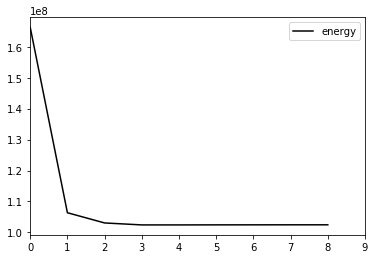

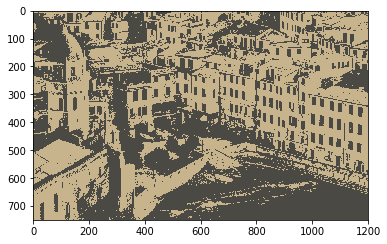

#2  K = 3 culstering.


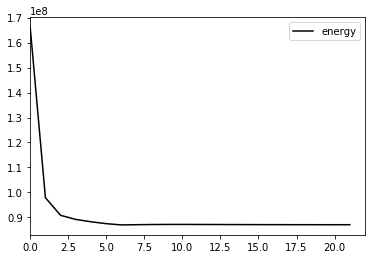

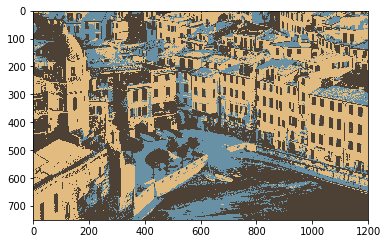

#3  K = 6 culstering.


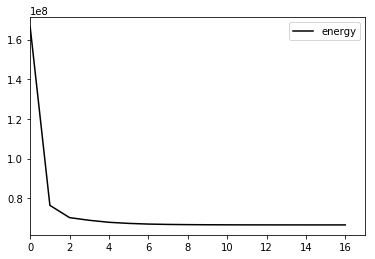

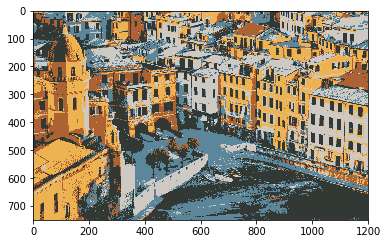

#4  K = 12 culstering.


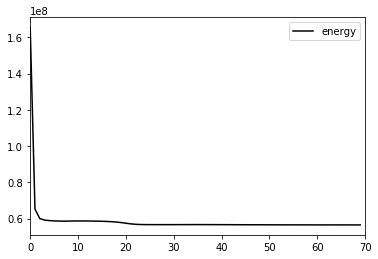

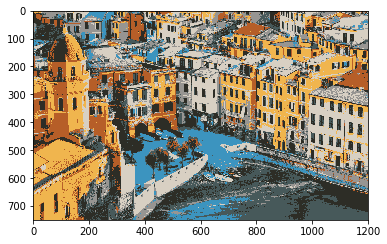

In [10]:
for index, K in enumerate(Ks):
    print("#" + str(index+1) + "  K = " + str(K) + " culstering.")
    labels = np.empty([height, width], dtype=int)
    before_labels = []
    energies = []
    randomLabeling(labels, K)
    pixels_labeled = makePixeldsLabeled(pixels, labels, K)
    while not np.array_equal(before_labels, labels):
        before_labels = np.array(labels, copy=True)
        centroids = makeCentroids(pixels_labeled, K)
        labelingBasedCentroid(pixels, labels, centroids)
        pixels_labeled = makePixeldsLabeled(pixels, labels, K)
        energies.append(calculateEnergy(pixels_labeled, centroids, K))
    # plot energy curve
    plt.figure()
    plt.xlim(0,len(energies))
    plt.plot(energies,color='black',label='energy')
    plt.legend()
    plt.show()
    # plot output image
    img = getOutputImage(labels, centroids)
    imgplot = plt.imshow(img)
    plt.show()